<div style="width:100%;"> 
<div style="float:left; width:70%;">
<h1 style="color:#0078c9;"> Expense Index Q3 2017</h1>
</div>
<div style="float:right; width:30%;">
<img src="https://seeklogo.com/images/C/concur-logo-F866D9D47F-seeklogo.com.png" align="right" width="45px" height="45px"/>
</div>
</div>

In [71]:
setwd("E:/Expense_Index_Floders/2017Q3_Expense_Index/EXPENSE INDEX REFRESH 17Q3/Submit_Date/2017Q3 (submit_date_key)/2015Q1-2017Q3")
getwd()

[1] "E:/Expense_Index_Floders/2017Q3_Expense_Index/EXPENSE INDEX REFRESH 17Q3/Submit_Date/2017Q3 (submit_date_key)/2015Q1-2017Q3"

In [72]:
#-------------Required libraries---------------------------------------------------------
options( warn = -1 )
library(ggplot2)
library(ggthemes)
library(extrafont)
library(dplyr)
library(scales)
library(bdscale)
library(tidyr)
options(scipen=1000000)

In [74]:
#---------------Input data Files---------------------------------------------------------
#---------------Global performnace on YOY growth ----------------------------------------
ExpenseIndex_17Q1 <-read.csv("Expenseindex_2015Q1_2017Q3.csv")
#colnames(ExpenseIndex_17Q3)

#---------------Segment wise performnace  ----------------------------------------
ExpenseIndex_Segment <-read.csv("Expenseindex_2015Q1_2017Q3_segment.csv")
#colnames(ExpenseIndex_SMN)

#---------------Geo wise performnace  -------------------------------------------
#ExpenseIndex_Geo <-read.csv("Expense_Index_Geo.csv")
#colnames(ExpenseIndex_Geo)

In [75]:
ExpenseIndex_YOY<-ExpenseIndex_17Q1 %>% 
mutate(YOY_1615Q1= ((X2016Q1-X2015Q1)/X2015Q1)*((X2015Q1+X2016Q1)/sum(X2015Q1+X2016Q1)),
       YOY_1615Q2= ((X2016Q2-X2015Q2)/X2015Q2)*((X2015Q2+X2016Q2)/sum(X2015Q2+X2016Q2)),
       YOY_1615Q3= ((X2016Q3-X2015Q3)/X2015Q3)*((X2015Q3+X2016Q3)/sum(X2015Q3+X2016Q3)),
       YOY_1615Q4= ((X2016Q4-X2015Q4)/X2015Q4)*((X2015Q4+X2016Q4)/sum(X2015Q4+X2016Q4)),
       YOY_1716Q1= ((X2017Q1-X2016Q1)/X2016Q1)*((X2016Q1+X2017Q1)/sum(X2016Q1+X2017Q1)),
       YOY_1716Q2= ((X2017Q2-X2016Q2)/X2016Q2)*((X2016Q2+X2017Q2)/sum(X2016Q2+X2017Q2)),
       YOY_1716Q3= ((X2017Q3-X2016Q3)/X2016Q3)*((X2016Q3+X2017Q3)/sum(X2016Q3+X2017Q3))
      )

Quarter<- c("2016Q1","2016Q2","2016Q3","2016Q4","2017Q1","2017Q2","2017Q3")
Weighted_YoY<-c(
round(sum(ExpenseIndex_YOY$YOY_1615Q1)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1615Q2)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1615Q3)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1615Q4)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1716Q1)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1716Q2)*100,2),
round(sum(ExpenseIndex_YOY$YOY_1716Q3)*100,2)
)
Weighted_YoY_17Q3 <-data.frame(Quarter,Weighted_YoY)


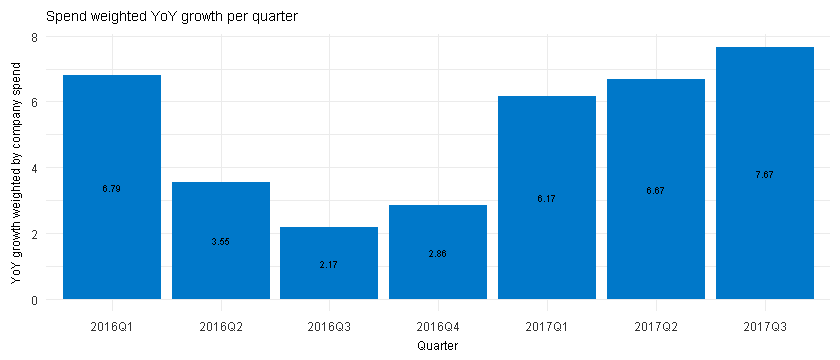

In [76]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(aes(x=Quarter,y=Weighted_YoY,label=Weighted_YoY),data=Weighted_YoY_17Q3)+ 
geom_bar(stat="identity",fill="#0078c9")+
theme_minimal()+
theme(title =element_text(size=7))+
theme(axis.text.x = element_text(colour="grey20",size=7),,axis.text.y = element_text(colour="grey20",size=7))+
geom_text(size = 2, position = position_stack(vjust = 0.5))+
labs(title = "Spend weighted YoY growth per quarter",x="Quarter",y="YoY growth weighted by company spend")

In [77]:
ExpenseIndex_Segment_YoY <-ExpenseIndex_Segment%>%group_by(Segment)%>%
mutate(YOY_1615Q1= ((X2016Q1-X2015Q1)/X2015Q1)*((X2015Q1+X2016Q1)/sum(X2015Q1+X2016Q1)),
       YOY_1615Q2= ((X2016Q2-X2015Q2)/X2015Q2)*((X2015Q2+X2016Q2)/sum(X2015Q2+X2016Q2)),
       YOY_1615Q3= ((X2016Q3-X2015Q3)/X2015Q3)*((X2015Q3+X2016Q3)/sum(X2015Q3+X2016Q3)),
       YOY_1615Q4= ((X2016Q4-X2015Q4)/X2015Q4)*((X2015Q4+X2016Q4)/sum(X2015Q4+X2016Q4)),
       YOY_1716Q1= ((X2017Q1-X2016Q1)/X2016Q1)*((X2016Q1+X2017Q1)/sum(X2016Q1+X2017Q1)),
      YOY_1716Q2= ((X2017Q2-X2016Q2)/X2016Q2)*((X2016Q2+X2017Q2)/sum(X2016Q2+X2017Q2)),
      YOY_1716Q3= ((X2017Q3-X2016Q3)/X2016Q3)*((X2016Q3+X2017Q3)/sum(X2016Q3+X2017Q3))
      )
      
ExpenseIndex_ENT_YoY<- subset(ExpenseIndex_Segment_YoY,Segment =='ENT')
ExpenseIndex_SMN_YoY<- subset(ExpenseIndex_Segment_YoY,Segment =='SMN')
Qtr<- c("2016Q1","2016Q2","2016Q3","2016Q4","2017Q1","2017Q2","2017Q3",
            "2016Q1","2016Q2","2016Q3","2016Q4","2017Q1","2017Q2","2017Q3")
Segment<-c("ENT","ENT","ENT","ENT","ENT","ENT","ENT","SMN","SMN","SMN","SMN","SMN","SMN","SMN")
Segment_YoY<-c(
round(sum(ExpenseIndex_ENT_YoY$YOY_1615Q1)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1615Q2)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1615Q3)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1615Q4)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1716Q1)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1716Q2)*100,2),
round(sum(ExpenseIndex_ENT_YoY$YOY_1716Q3)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1615Q1)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1615Q2)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1615Q3)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1615Q4)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1716Q1)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1716Q2)*100,2),
round(sum(ExpenseIndex_SMN_YoY$YOY_1716Q3)*100,2)
)
Weighted_Segment_YoY <-data.frame(Qtr,Segment,Segment_YoY)

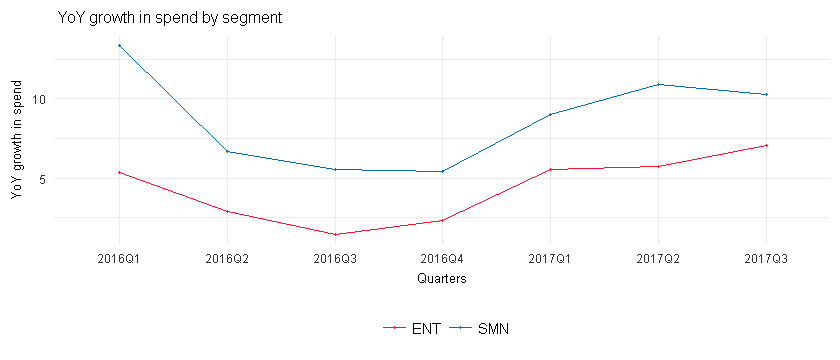

In [86]:
ggplot(Weighted_Segment_YoY,aes(x =Qtr,y=Segment_YoY,group=Segment,color=Segment))+
geom_line(size =0.2)+
geom_point(size =0.4)+
theme_minimal()+ theme(legend.title=element_blank()) + scale_color_manual(values=c("#FF1234", "#0072B2"))+ 
theme(title =element_text(size=8))+ theme(legend.position="bottom")+
theme(axis.text.x = element_text(colour="grey20",size=7),axis.text.y = element_text(colour="grey20",size=7))+
labs(title = " YoY growth in spend by segment ",x="Quarters",y="YoY growth in spend")